In [1]:
!pip install fastai
!pip install -U pyarrow

import numpy as np
import pandas as pd
import seaborn as sns

import requests
import ast
import os
import gc
import matplotlib.pyplot as plt

from fastai.vision import *
from fastai.metrics import error_rate, accuracy

Requirement already up-to-date: pyarrow in /usr/local/lib/python3.6/dist-packages (0.13.0)


In [2]:
# Will need to login to access the bucket. The following lines of code do just that
from google.colab import auth
auth.authenticate_user()

# List out all the files in the directory (Make sure that we are logged in)
gs_path = 'platform-ai-research/datasets/ProductNet/'
!gsutil ls gs://{gs_path}

gs://platform-ai-research/datasets/ProductNet/crawl-300d-2M.vec
gs://platform-ai-research/datasets/ProductNet/df2_20000
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_5_4
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_7
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_7_2
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_7_3
gs://platform-ai-research/datasets/ProductNet/df_new_label
gs://platform-ai-research/datasets/ProductNet/labels_5m
gs://platform-ai-research/datasets/ProductNet/metadata.feather
gs://platform-ai-research/datasets/ProductNet/metadata_clean_0513
gs://platform-ai-research/datasets/ProductNet/taxonomy-with-ids.en-US.xls
gs://platform-ai-research/datasets/ProductNet/urls_20000
gs://platform-ai-research/datasets/ProductNet//
gs://platform-ai-research/datasets/ProductNet/images/
gs://platform-ai-research/datasets/ProductNet/images_999/
gs://platform-ai-research/datasets/ProductNet/images_folder/
gs://p

Run the following only once.

In [0]:
# # Pull from GS
# gs_path = 'platform-ai-research/datasets/ProductNet/'

# file_name = 'df_new_label'
# remote_file = gs_path + file_name
# !gsutil cp gs://{remote_file} {file_name} 

# file_name = 'images_999'
# remote_file = gs_path + file_name
# !gsutil cp -r gs://{remote_file} {file_name} 

Our final working `df` is `df_new_label`. It contains 999 entries and 10 classes. The folder we store the images is `images_999`. These can be found in the GS bucket.

Rerun from here after cleaning the labels.

In [0]:
df = pd.read_feather('df_new_label')

In [8]:
df.dropna(inplace=True)

print('len of df:', len(df))

len of df: 998


In [0]:
np.random.seed(42)

tfms = get_transforms(max_lighting=0.1, max_zoom=1.05, max_warp=0.)

src = ImageDataBunch.from_df('./', 
                             df, 
                             folder='images_999', 
                             suffix='.jpg', 
                             ds_tfms=tfms, 
                             size=224, 
                             bs=64).normalize(imagenet_stats)

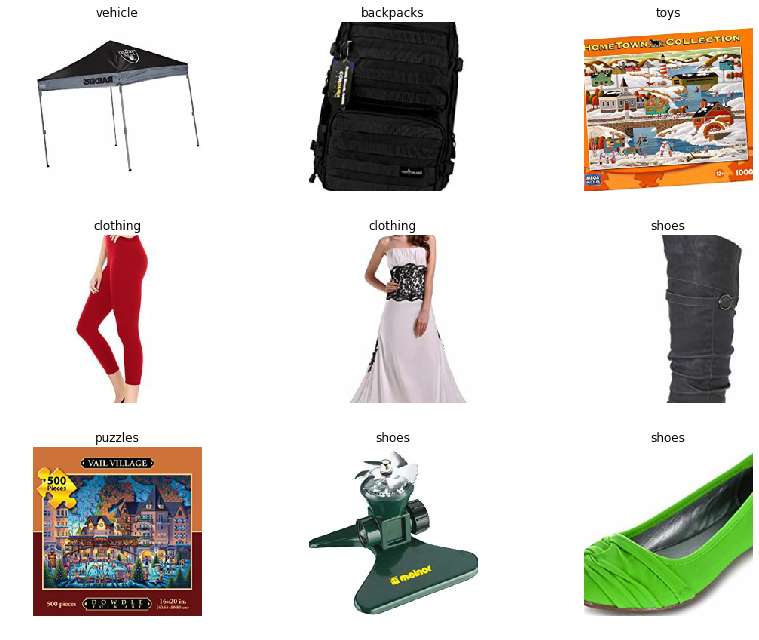

In [10]:
src.show_batch(rows=3, figsize=(12,9))

In [11]:
# # print(src.classes)
len(src.classes)

10

In [12]:
df.head()

,asin,file_name
0,B004SZGHGO,shoes
1,B000J2ODDY,lawn
2,B004HEWZ6C,clothing
3,B001CS69L8,clothing
4,B001CPK8I6,shoes


In [0]:
learn = cnn_learner(src, models.resnet50, metrics=error_rate)

In [15]:
gc.collect()

16027

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.749337,1.187034,0.351759,00:10
1,1.225290,1.124292,0.316583,00:08
2,0.938644,0.990683,0.331658,00:08
3,0.748508,0.972533,0.306533,00:08


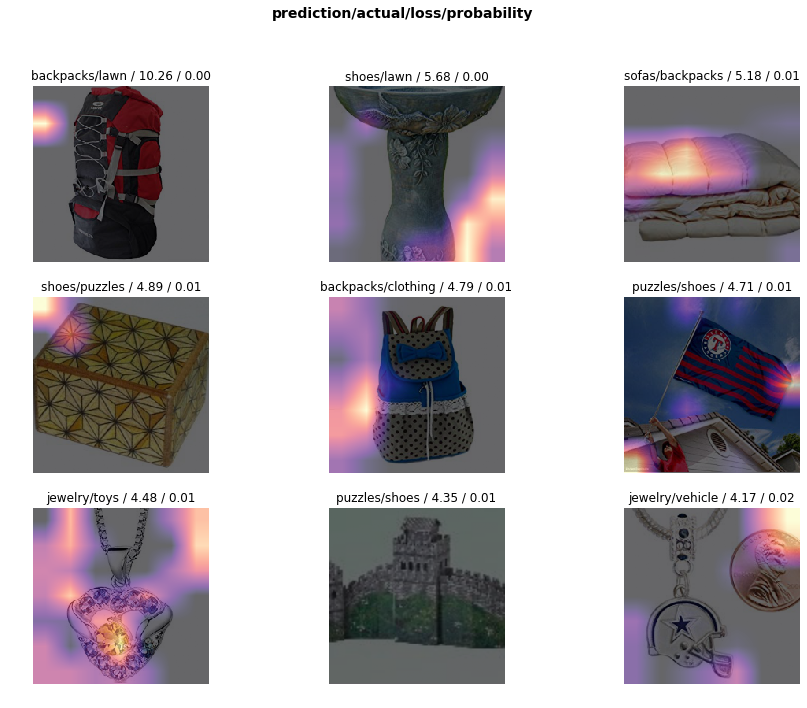

In [17]:
interp_valid = ClassificationInterpretation.from_learner(learn)
interp_valid.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.478012,1.752385,0.366834,00:10
1,0.423893,1.416758,0.331658,00:10


In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


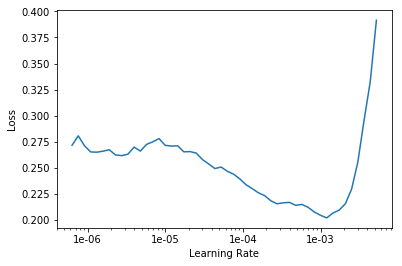

In [21]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.041891,1.203113,0.276382,00:10
1,0.043840,1.186291,0.251256,00:10
2,0.039279,1.219254,0.286432,00:10
3,0.038019,1.278105,0.291457,00:10
4,0.035640,1.219669,0.281407,00:10
5,0.032330,1.219896,0.266332,00:10
6,0.029701,1.224741,0.246231,00:10
7,0.027173,1.236433,0.256281,00:10
8,0.025362,1.233053,0.261307,00:10
9,0.022266,1.236925,0.256281,00:10
